In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Health_AnimalBites.csv')

In [11]:
data.head(1)
#data.dtypes

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN


In [12]:
#reatin just date and not time in datetime column, since time is never recorded
data.bite_date = pd.to_datetime(data.bite_date, errors='coerce')
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [13]:
#clearly there wasn an error 
print(data.bite_date.max())
print(data.bite_date.min())

2201-05-01 00:00:00
1952-05-28 00:00:00


In [18]:
#looks like there are at least five dates that we know are incorrect
mask = (data['bite_date'] > '2021-01-30') 
incorrect_dates = data.loc[mask]
incorrect_dates

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1512,2101-02-18,CAT,NaN,FEMALE,BLACK,NaN,NaN,40202,NaN,BODY,2011-02-18 00:00:00,RELEASED,NaN,NaN,NaN
3012,2021-04-22,DOG,PIT BULL,MALE,BRINDLE,NaN,NaN,40272,NaN,BODY,NaN,NaN,NaN,NaN,NaN
5055,2201-01-21,CAT,NaN,MALE,GRAY,NaN,NaN,NaN,NaN,HEAD,NaN,NaN,NaN,NaN,NaN
6293,2201-02-21,DOG,PIT BULL,MALE,TAN WHITE,1.0,2015-04-21 00:00:00,NaN,NaN,BODY,NaN,NaN,NaN,NaN,NaN
6505,2201-05-01,DOG,DACHSHUND,MALE,BROWN,1.0,2015-05-19 00:00:00,40229,NO,BODY,NaN,RELEASED,NaN,2015-05-11 00:00:00,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8685 non-null   datetime64[ns]
 1   SpeciesIDDesc      8885 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   object        
 7   victim_zip         7165 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8387 non-null   object        
 10  quarantine_date    2020 non-null   object        
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    object        
 13  release_date       1445 non-null   object        
 14  ResultsI

In [24]:
bite_species = data['SpeciesIDDesc'].value_counts().to_frame(name='count')
bite_species = bite_species.reset_index()
bite_species = bite_species.rename(columns={'index':'Species','count':'Count'})
bite_species.head()

,Species,Count
0,DOG,7029
1,CAT,1568
2,BAT,237
3,RACCOON,27
4,OTHER,11


## Determine number/% of missing values per column 

In [ ]:
missing = pd.concat([data.isnull().sum(), 100 * bite_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

## Bar Graph of bites by species

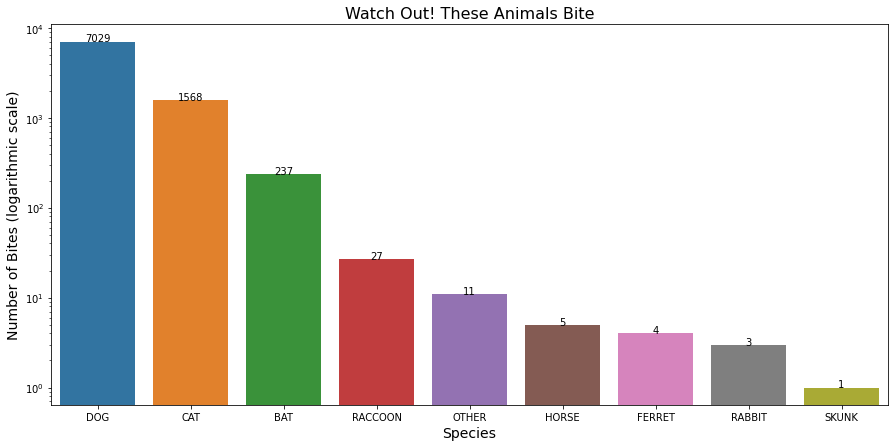

In [29]:
plt.figure(figsize=(15,7))
species_bite = sns.barplot(x='Species', y='Count', data=bite_species)
species_bite.set_yscale('log')
for index, row in bite_species.iterrows():
    species_bite.text(row.name,row.Count, round(row.Count,2), color='black', ha="center")
species_bite.set_xlabel('Species', fontsize=14)
species_bite.set_ylabel('Number of Bites (logarithmic scale)', fontsize=14)
species_bite.set_title('Watch Out! These Animals Bite', fontsize=16)
plt.savefig('BiteBySpecies.png')

## Determine the body-location of bites

In [31]:
bite_location = data['WhereBittenIDDesc'].value_counts().to_frame(name='count')
bite_location = bite_location.reset_index()
bite_location = bite_location.rename(columns={'index':'Location','count':'Count'})
bite_location.head()


,Location,Count
0,BODY,6213
1,HEAD,1244
2,UNKNOWN,930


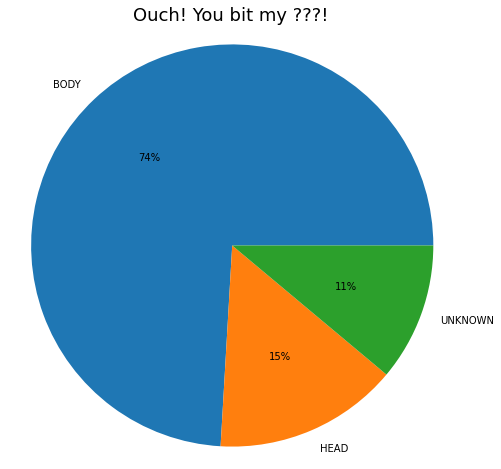

In [34]:
labels = bite_location['Location']
sizes = bite_location['Count']

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, labels=labels, autopct='%1.0f%%')
ax.axis('equal')
plt.title('Ouch! You bit my ???!', fontsize=18);
plt.savefig('BiteLocations.png')

## Determine the most dangerous breeds

In [36]:
breed = data['BreedIDDesc'].dropna()
breed = breed.value_counts().to_frame(name='Count')
breed = breed.reset_index()
breed = breed.rename(columns={'index':'Breed'})
breed.head(10)

,Breed,Count
0,PIT BULL,1102
1,GERM SHEPHERD,327
2,LABRADOR RETRIV,253
3,BOXER,181
4,CHICHAUHUA,165
5,SHIH TZU,119
6,BEAGLE,116
7,ROTTWEILER,86
8,AAUST. TERR.,78
9,DACHSHUND,67


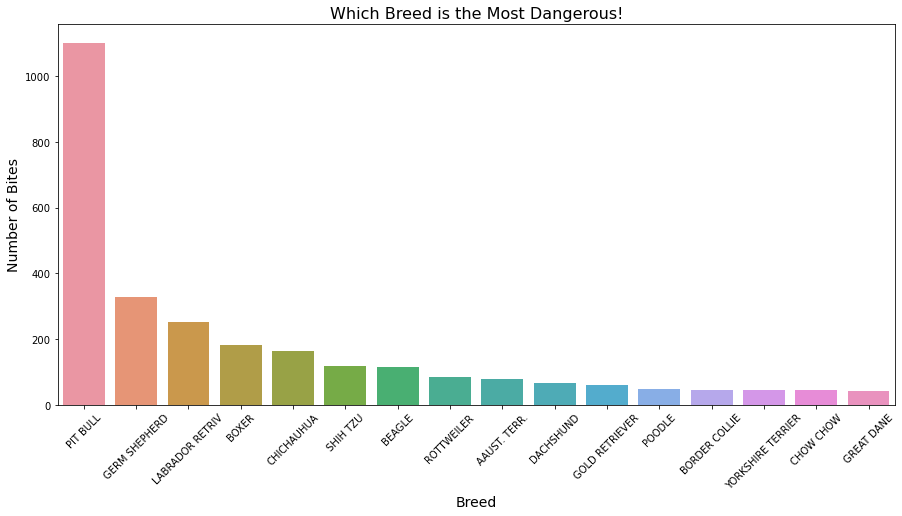

In [53]:
plt.figure(figsize=(15,7))
g = sns.barplot(x='Breed', y='Count', data=breed.loc[0:15, :])


g.set_xlabel('Breed', fontsize=14)
g.set_ylabel('Number of Bites', fontsize=14)
g.set_title('Which Breed is the Most Dangerous!', fontsize=16)

plt.xticks(rotation=45)
plt.savefig('BiteByBreed.png')


## Bite Frequency by Day of Week 

In [55]:
daily_bites = data['bite_date'].to_frame()
daily_bites['bite_date'] = daily_bites['bite_date'].dt.dayofweek
daily_bites = daily_bites.value_counts().to_frame().reset_index().rename(columns={'bite_date':'Day', 0:'Count'})
daily_bites = daily_bites.sort_values(by=['Day'])
daily_bites.head(7)

,Day,Count
5,0.0,1194
1,1.0,1271
6,2.0,1139
4,3.0,1213
3,4.0,1217
0,5.0,1399
2,6.0,1252


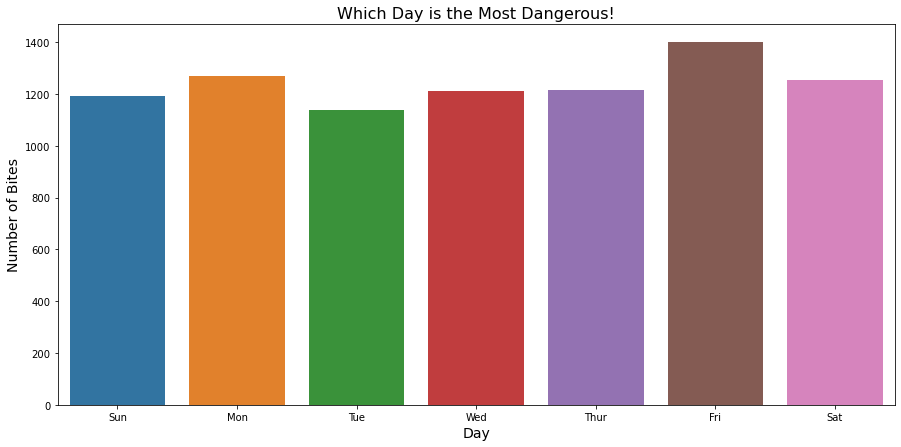

In [56]:
plt.figure(figsize=(15,7))
g = sns.barplot(x='Day', y='Count', data=daily_bites)

g.set_xticklabels(['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
g.set_xlabel('Day', fontsize=14)
g.set_ylabel('Number of Bites', fontsize=14)
g.set_title('Which Day is the Most Dangerous!', fontsize=16)
plt.savefig('BiteByDay.png')